In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
data=pd.read_csv("Social_Network_Ads.csv")

In [88]:
data.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [89]:
X=data.iloc[:,[2,3]]
Y=data.iloc[:,4]

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [91]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [92]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression();
classifier.fit(x_train,y_train)

LogisticRegression()

In [93]:
y_pred=classifier.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [95]:
cm

array([[65,  3],
       [ 8, 24]])

In [96]:
plt.rcParams['figure.dpi'] = 125
plt.rcParams['savefig.dpi'] = 125

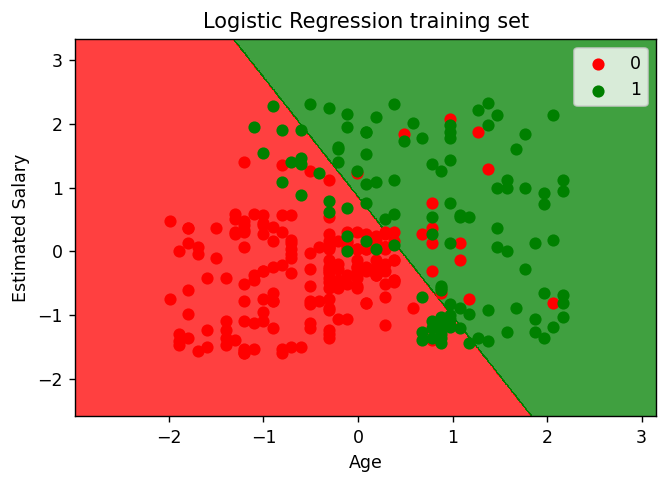

In [97]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1 , stop=x_set[:,0].max()+1 , step=0.01),
                  np.arange(start=x_set[:,1].min()-1 , stop=x_set[:,1].max()+1 , step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j,in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
              c=ListedColormap(('red','green'))(i),label=j)
plt.title("Logistic Regression training set")
plt.xlabel('Age')
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

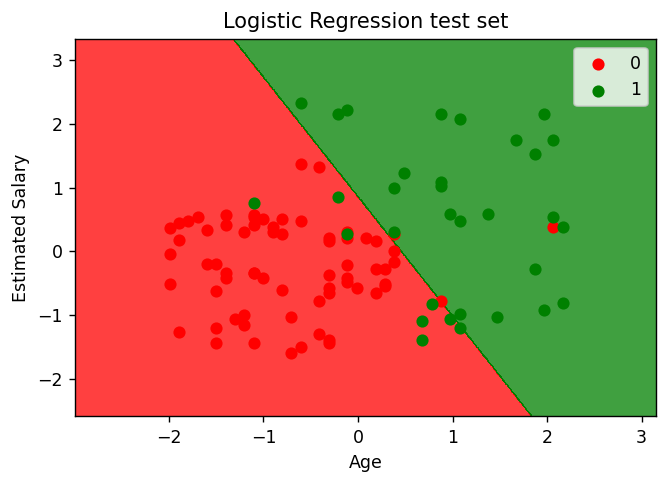

In [98]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1 , stop=x_set[:,0].max()+1 , step=0.01),
                  np.arange(start=x_set[:,1].min()-1 , stop=x_set[:,1].max()+1 , step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j,in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
              c=ListedColormap(('red','green'))(i),label=j)
plt.title("Logistic Regression test set")
plt.xlabel('Age')
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()